<a href="https://colab.research.google.com/github/FarkhandaMalik/dip-lab2/blob/main/FarkhandaDIPAss4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np

In [2]:
def printImage(image):
    cv2.imshow('Image',image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


In [6]:
CJ = cv2.imread('amgg63.jpg')
if CJ is None:
    print("Image not found or unable to load.")
else:
    CJ = cv2.resize(CJ, (800, 600))

CAR = cv2.imread('amgg63.jpg')
CAR = cv2.resize(CAR,(800,600))

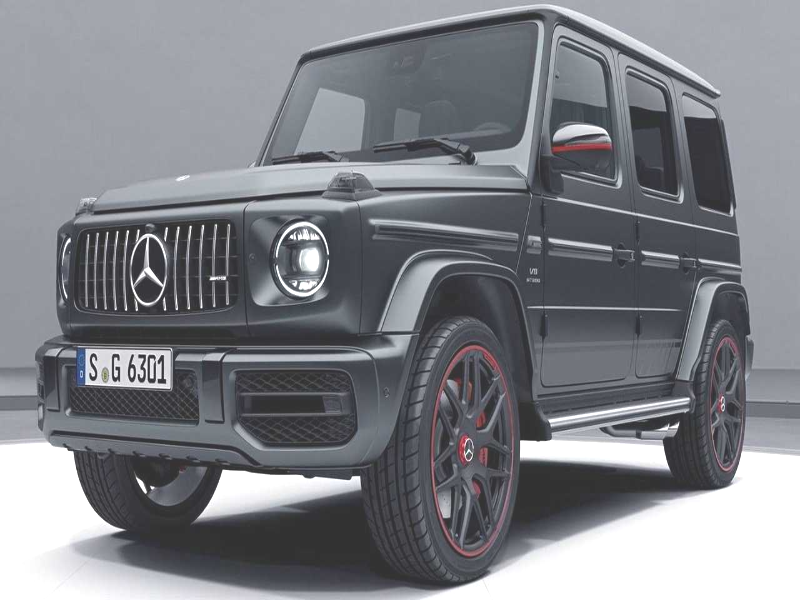

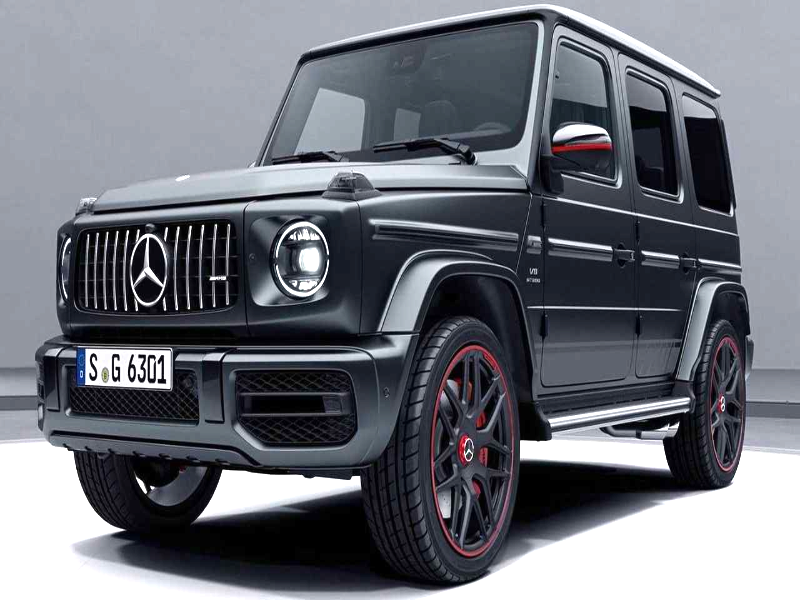

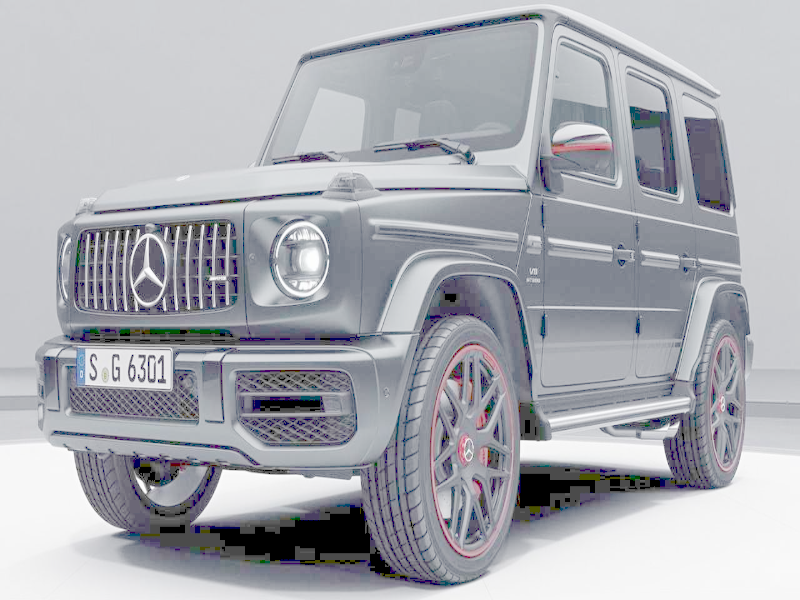

In [9]:
from google.colab.patches import cv2_imshow
# Increase brightness
incBrightness = cv2.add(CJ, (50, 50, 50))
cv2_imshow(incBrightness)

# Adjust contrast
contrastImage = cv2.convertScaleAbs(CAR, alpha=1.5, beta=0)
cv2_imshow(contrastImage)

# Gamma correction
gamma = 4
invGamma = 1 / gamma
gammaCorrect = np.array(255 * (CJ / 255) ** invGamma, dtype='uint8')
cv2_imshow(gammaCorrect)

# Inverted image
invertedImage = cv2.bitwise_not(CJ)
cv2_imshow(invertedImage)

In [11]:
lowerRange = np.array([0,100,0])
upperRange = np.array([70,255,70])

lowerRange, upperRange

(array([  0, 100,   0]), array([ 70, 255,  70]))

In [12]:
CJMask = cv2.inRange(CJ,lowerRange,upperRange)

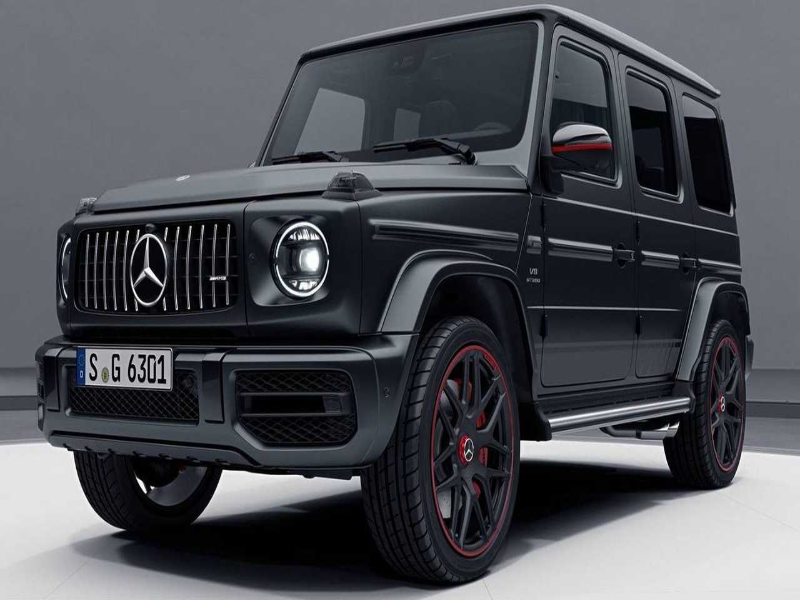

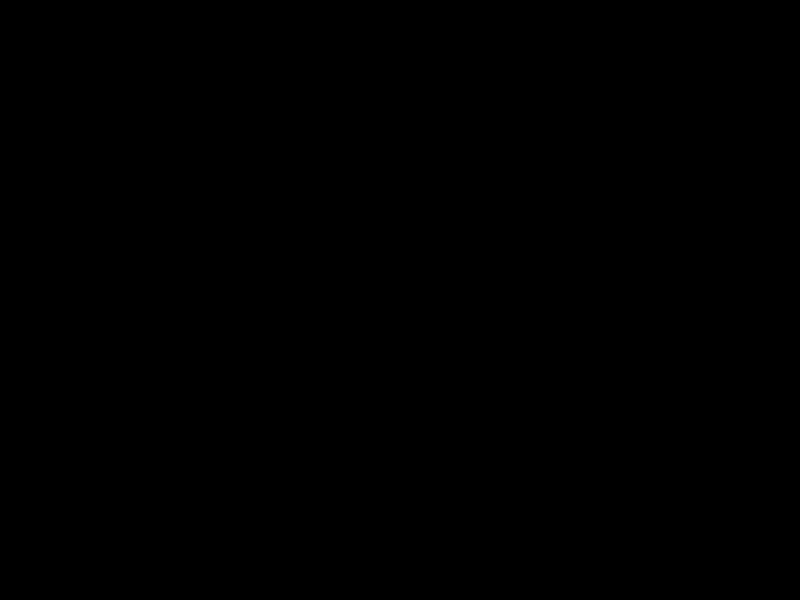

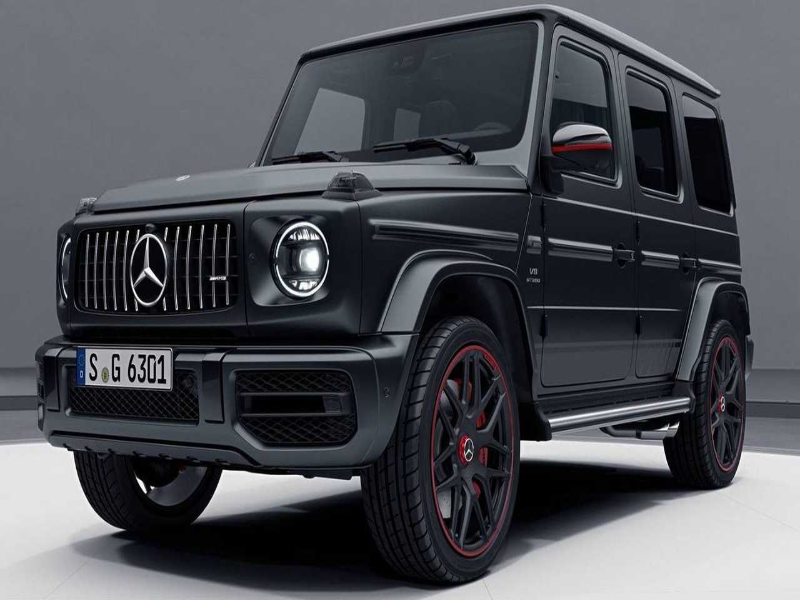

In [17]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np


lowerRange = np.array([0, 100, 0])
upperRange = np.array([60, 255, 60])

CJMask = cv2.inRange(CJ, lowerRange, upperRange)

cv2_imshow(CJMask)

CJ[CJMask != 0] = [0, 0, 0]
cv2_imshow(CJ)

CAR[CJMask == 0] = [0, 0, 0]
cv2_imshow(CAR)

joinedImage = CAR + CJ

cv2_imshow(joinedImage)


Picture 1 shape: (459, 812, 3)
Picture 2 shape: (459, 812, 3)


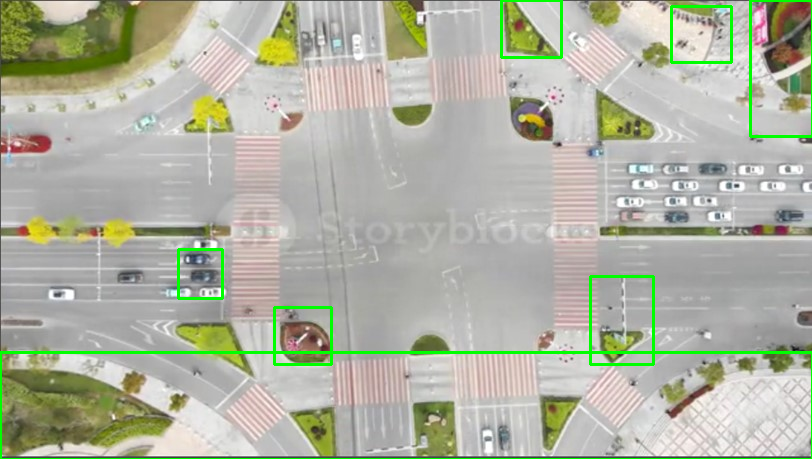

In [22]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

p1 = cv2.imread('Picture1.jpg')
p2 = cv2.imread('Picture2.jpg')


print("Picture 1 shape:", p1.shape)
print("Picture 2 shape:", p2.shape)

if p1.shape != p2.shape:
    p2 = cv2.resize(p2, (p1.shape[1], p1.shape[0]))

# Convert to grayscale
gray1 = cv2.cvtColor(p1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(p2, cv2.COLOR_BGR2GRAY)

# Subtract the frames
diff = cv2.absdiff(gray1, gray2)

# Apply thresholding
_, thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

# Morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# Find contours
contours, _ = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Analyze contours to determine lanes with movement
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 500:  # Adjust this threshold based on the expected size of vehicles
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(p1, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Show the result
cv2_imshow(p1)